In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
ticker = yf.Ticker("AAPL")
history = ticker.history(period="max")
latest_date = history.tail(1).index[0]
s_date = input("Enter the period in '%Y-%m-%d' format")

In [13]:
BTC_USD = yf.download("BTC-USD", start= s_date, end= latest_date, interval='1d')
BTC_USD.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Computing the Simple Moving Averages

In [16]:
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=100, min_periods=1).mean()
BTC_USD['SMA_300'] = BTC_USD['Close'].rolling(window = 300, min_periods = 1).mean()
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_30,SMA_300,Signal,Position
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,457.334015,457.334015,0.0,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,440.887009,440.887009,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,425.523336,425.523336,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,421.368500,421.368500,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,416.859003,416.859003,0.0,0.0


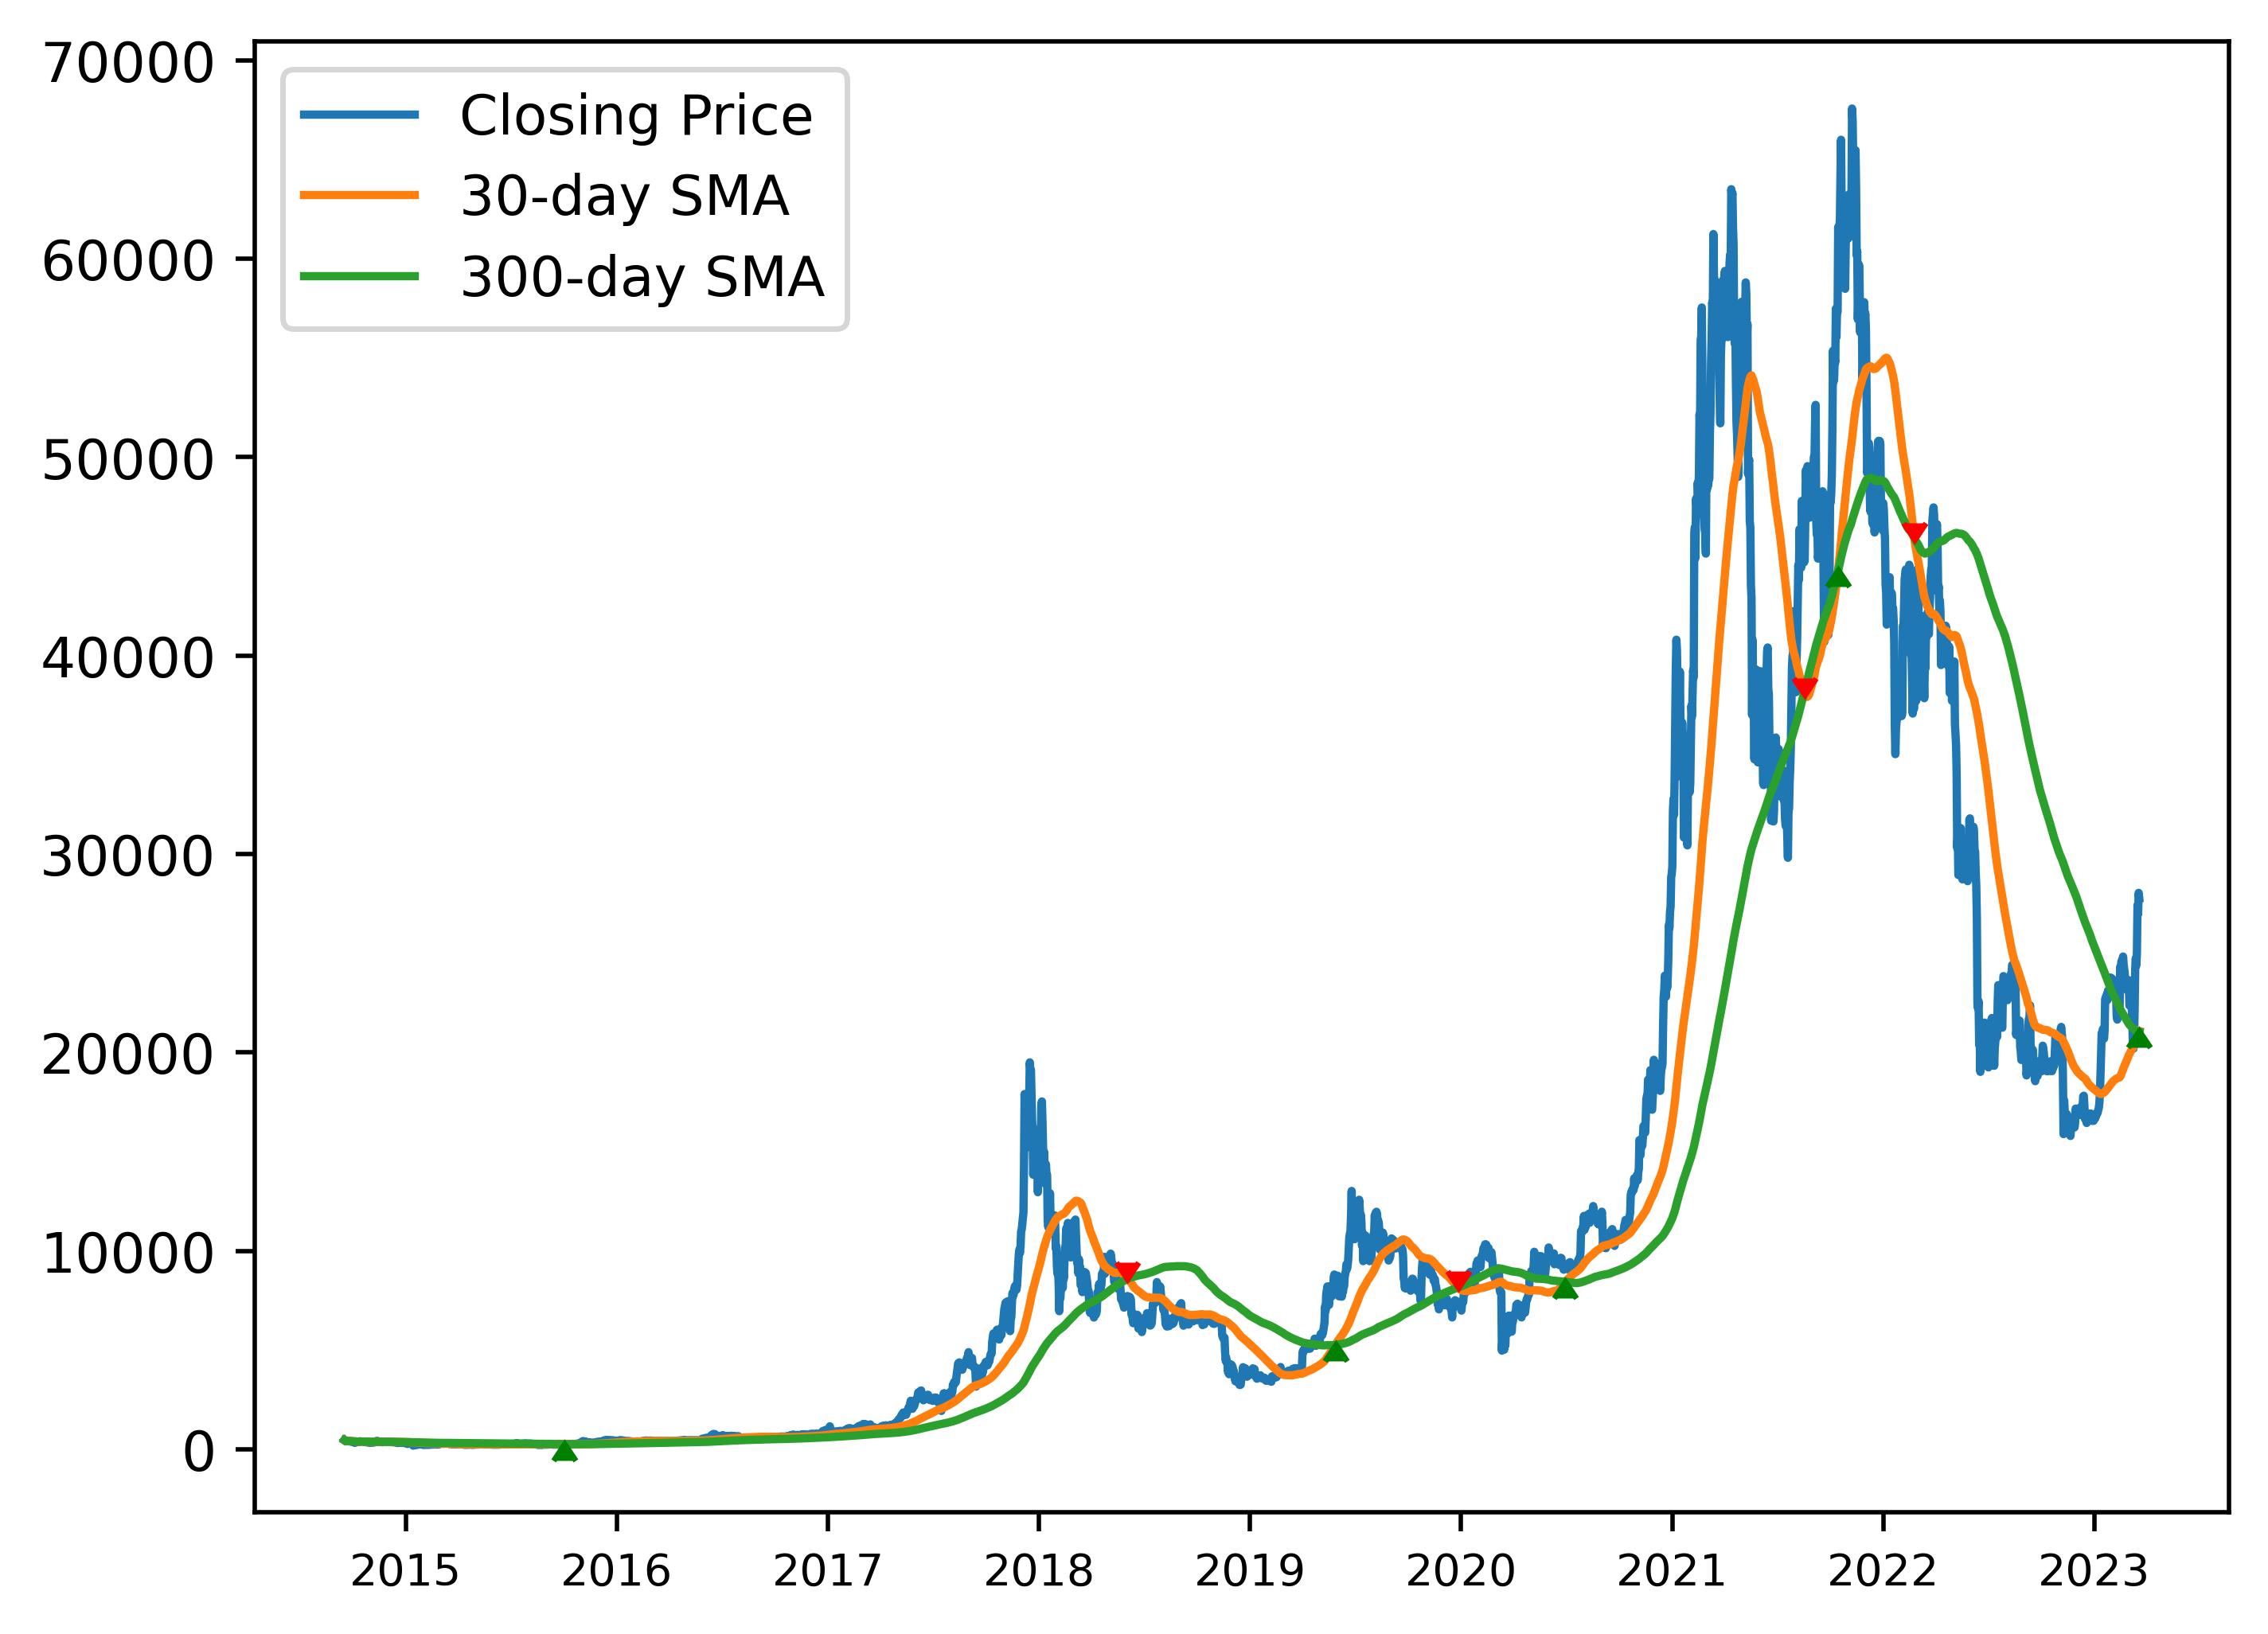

In [20]:
BTC_USD['Signal'] = 0.0
BTC_USD['Signal'] = np.where(BTC_USD['SMA_30'] > BTC_USD['SMA_300'], 1.0, 0.0)   
BTC_USD['Position'] = BTC_USD['Signal'].diff()


fig, ax = plt.subplots(dpi=500)
ax.tick_params(axis='x', labelsize=8)

ax.plot(BTC_USD.index, BTC_USD['Close'], label='Closing Price')
ax.plot(BTC_USD['SMA_30'].index, BTC_USD['SMA_30'] , label='30-day SMA')
ax.plot(BTC_USD['SMA_300'].index, BTC_USD['SMA_300'] , label='300-day SMA')

ax.plot(BTC_USD.loc[BTC_USD['Position']==1.0].index, BTC_USD.SMA_30[BTC_USD['Position'] == 1.0],marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(BTC_USD.loc[BTC_USD['Position'] == -1.0].index, BTC_USD.SMA_30[BTC_USD['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')

ax.legend()
plt.show()